<img width="50" src="https://carbonplan-assets.s3.amazonaws.com/monogram/dark-small.png" style="margin-left:0px;margin-top:20px"/>

# MTBS monthly downsampling and reprojection

_by Joe Hamman (CarbonPlan), August 5, 2020_

This notebook downsamples and reprojects monthly MTBS 30m rasters stored in Cloud Optimized GeoTIFF 4000m GeoTIFFs.

**Inputs:**

- Monthly COGs

**Outputs:**

- COG outputs after downsampling and reprojection

**Notes:**

- Source CRS and projection extent come from MTBS


In [1]:
import os

In [13]:
from carbonplan_data.utils import projections, setup

workdir, upload = setup("jeremy")
workdir

PosixPath('/Users/freeman/workdir/carbonplan-data')

In [12]:
from rio_cogeo.cogeo import cog_translate
from rio_cogeo.profiles import cog_profiles

dst_profile = cog_profiles.get("deflate")

In [28]:
def get_file(region, fire, year, month):
    return {
        "source": (workdir / f"processed/mtbs/{region}/30m/{fire}_{year}.{month:02g}.tif").as_posix(),
        "target": f"processed/mtbs/{region}/4000m/tif/{fire}.{month:02g}.tif",
    }

In [ ]:
resolution = 4000

for year in [1984]:
    for month in [1]:
        for fire in ["vlf"]:
            for region in ["ak", "conus"]:
                f = get_file(region, fire, year, month)
                crs, extent = projections("albers", region)
                resampling = "average"
                cmd = (
                    "gdalwarp "
                    "-t_srs '%s' "
                    "-te %s "
                    "-tr %s %s "
                    "-r %s "
                    "%s "
                    "%s"
                ) % (
                    crs,
                    extent,
                    resolution,
                    resolution,
                    resampling,
                    f["source"],
                    "./raster.tif",
                )
                os.system(cmd)
                cog_translate("./raster.tif", "./raster.tif", dst_profile)
                upload("./raster.tif", f["target"])
                os.remove("./raster.tif")

In [30]:
files = [get_file('conus', 'vlf', 1984, month)['source'] for month in range(12)]

In [148]:
resolution = 4000

for year in [2017]:
    for region in ["conus"]:
        
        for fire in ["vlf"]:
            files = [get_file('conus', 'vlf', year, month + 1)['source'] for month in range(12)]
            crs, extent = projections("albers", region)
            resampling = "sum"
            cmd = (
                "gdalwarp "
                "-t_srs '%s' "
                "-te %s "
                "-tr %s %s "
                "-r %s "
                "%s "
                "%s"
            ) % (
                crs,
                extent,
                resolution,
                resolution,
                resampling,
                ' '.join(files),
                "./raster.tif",
            )
            print(cmd)
            os.system(cmd)
            #cog_translate("./raster.tif", "./raster.tif", dst_profile)
            #upload("./raster.tif", f["target"])
            #os.remove("./raster.tif")

gdalwarp -t_srs 'PROJCS["Albers_Conical_Equal_Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],TOWGS84[0,0,0,-0,-0,-0,0],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["meters",1]]' -te -2493045.0 177285.0 2342655.0 3310005.0 -tr 4000 4000 -r sum /Users/freeman/workdir/carbonplan-data/processed/mtbs/conus/30m/vlf_2017.01.tif /Users/freeman/workdir/carbonplan-data/processed/mtbs/conus/30m/vlf_2017.02.tif /Users/freeman/workdir/carbonplan-data/processed/mtbs/conus/30m/vlf_2017.03.tif /Users/freeman/workdir/carbonplan-data/processed/mtbs/conus/30m/vlf_2017.04.tif /Users/freeman/w

In [85]:
import rasterio
r = rasterio.open('/Users/freeman/workdir/carbonplan-data/processed/mtbs/conus/30m/vlf_2018.09.tif')
im = r.read(1)

In [149]:
r = rasterio.open('./raster.tif')
im = r.read(1)

In [51]:
%matplotlib inline

In [52]:
from showit import image

In [119]:
im.sum()

4

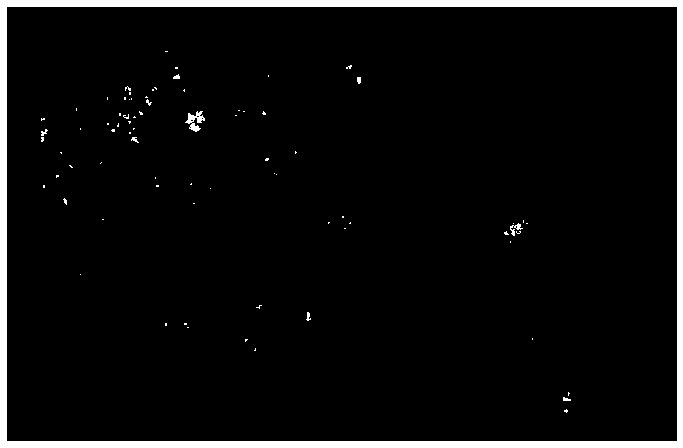

In [150]:
image(im, size=12, clim=(0,1))

In [92]:
from carbonplan_forests import load

In [93]:
mtbs = load.mtbs(store='local')

In [167]:
before = mtbs.groupby('time.year').sum().sel(year=2018)['vlf']

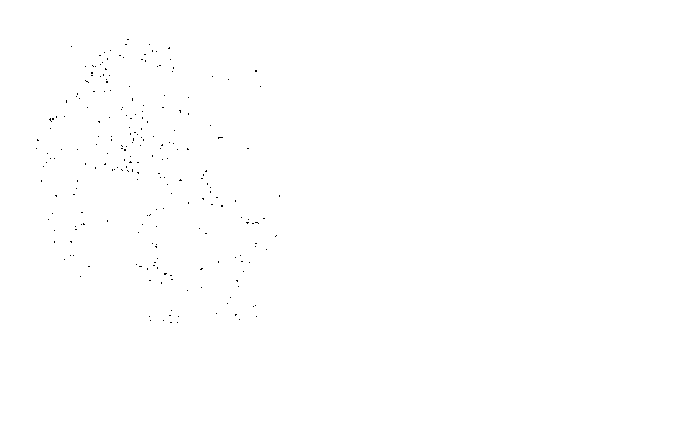

In [166]:
image(1-before, size=12, clim=(0,1))